### Plot structure and dispersion curve of modes 0, 1, 2 AST

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.io as sio
import pandas as pd

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def get_Brink(file_fig, file_ratio):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]

    # (u is cross-shore and v is alongshore in Brink. I'm flipping them back right here)
    p0, v0, u0, w0, r0 = file['p_profile'], file['u_profile'],file['v_profile'], file['w_profile'], file['r_profile']

    file_rfw = sio.loadmat(file_ratio)
    R = file_rfw['ratio_for_wave'][0][0]
    print('ratio for wave', R)
    print('k (rad/cm) ', k)
    print('lambda (km) ', (2*np.pi/(k*100E3)))
    print('omega (rad/s) ', f)
    print('c (m/s)', (f/(k*100)))
    scale=0.2
    w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    return(u,v,w,r,p,z,k,f,xpl, xxx, zzz)

def plot_Brink(ax2,ax3,ax4,u,v,p,z,xpl,xxx,zzz,minp,maxp,nlev=15):
    landc='#8b7765'
    levels=np.linspace(minp,maxp,nlev)
    p3 = ax4.contourf(xpl, z, p, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                      vmax=maxp, zorder=1)
    ax4.contour(xpl, z, p, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax4.contour(xpl, z, p, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax4.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax4.set_title('p')

    levels=np.linspace(np.nanmin(v),np.nanmax(v),nlev)
    p4 = ax2.contourf(xpl, z, v, levels=levels, cmap=cmo.cm.balance, vmin=-np.nanmax(v),
                      vmax=np.nanmax(v), zorder=1)
    ax2.contour(xpl, z, v, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax2.contour(xpl, z, v, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax2.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax2.set_title('v, cross-shelf')

    levels=np.linspace(np.nanmin(u),np.nanmax(u),nlev)
    p4 = ax3.contourf(xpl, z, u, levels=levels, cmap=cmo.cm.balance, vmin=np.nanmin(u),
                      vmax=-np.nanmin(u), zorder=1)
    ax3.contour(xpl, z, u, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax3.contour(xpl, z, u, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax3.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax3.set_title('u, along-shelf')

def plot_surface(ax0,ax1,v,p,xpl):
    ax0.plot(xpl,p,'-', color='navy', label='surface pressure')
    ax1.plot(xpl,v,'-', color='navy', label='surface cross-shore vel.')
    ax0.axhline(0, color='0.5')
    ax1.axhline(0, color='0.5')
    ax0.set_ylabel('P')
    ax1.set_ylabel('v')
    ax0.legend()
    ax1.legend()
    ax1.set_xlabel('Cross-shelf distance / km')

### Shelf profile

ratio for wave 121.34201017151383
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  1.047092013888889e-06
c (m/s) 104.70920138888889


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,0,'Cross-shelf distance / km')

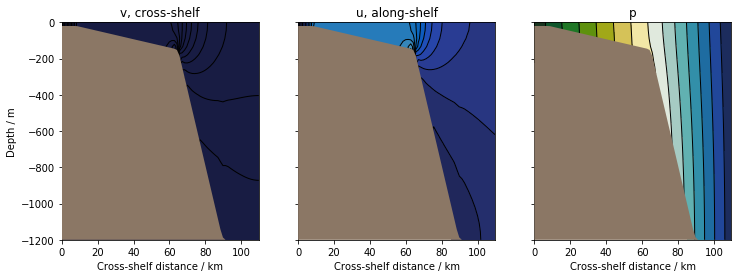

In [4]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode0_AST.mat' ,
                                        '../AST/ratio_for_wave_mode0_AST.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

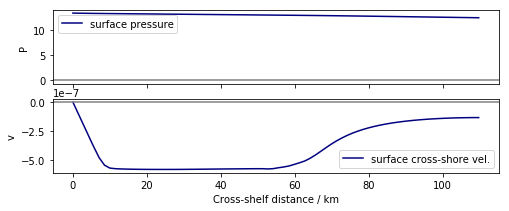

In [5]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 10.819446904504993
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  5.01844618055557e-08
c (m/s) 5.0184461805555705


Text(0.5,0,'Cross-shelf distance / km')

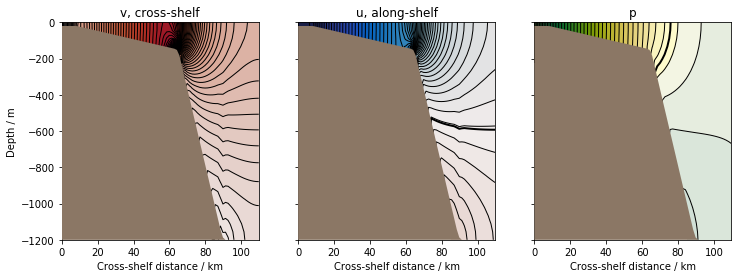

In [6]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode1_AST.mat' ,
                                        '../AST/ratio_for_wave_mode1_AST.mat')
minp = - np.nanmax(p)
maxp = np.nanmax(p)
nlevels = 70
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp, nlev=nlevels)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

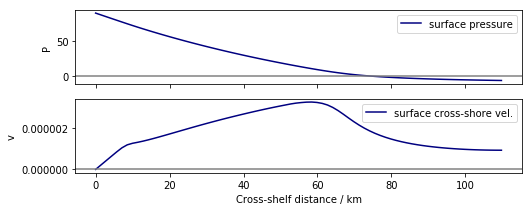

In [7]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 1.6282211932608446
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  8.06568287037037e-09
c (m/s) 0.806568287037037


Text(0.5,0,'Cross-shelf distance / km')

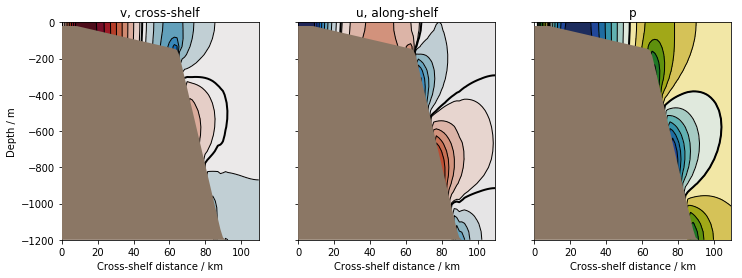

In [8]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode2_AST.mat' ,
                                        '../AST/ratio_for_wave_mode2_AST.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

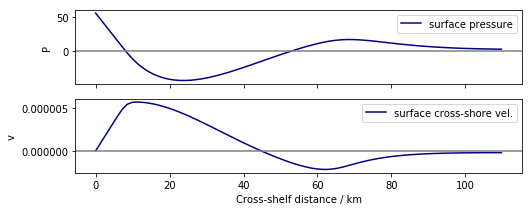

In [9]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

### Axis profile

ratio for wave 183.2303935170264
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  1.051613136574074e-06
c (m/s) 105.1613136574074


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,0,'Cross-shelf distance / km')

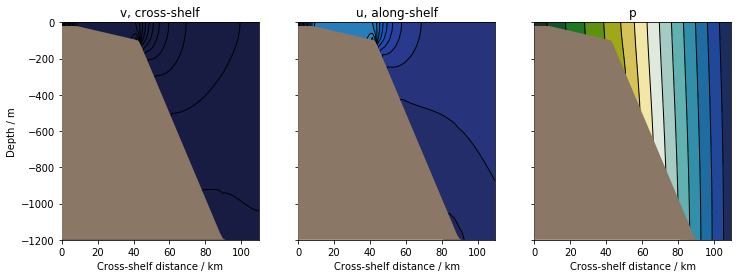

In [10]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode0_ASTAX.mat' ,
                                        '../AST/ratio_for_wave_mode0_ASTAX.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

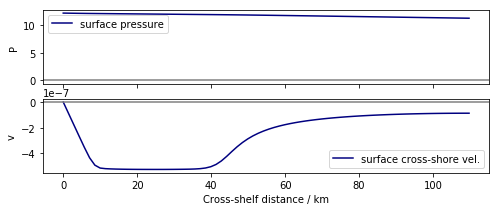

In [11]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 7.686893810637597
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  3.9605034722222226e-08
c (m/s) 3.9605034722222223


Text(0.5,0,'Cross-shelf distance / km')

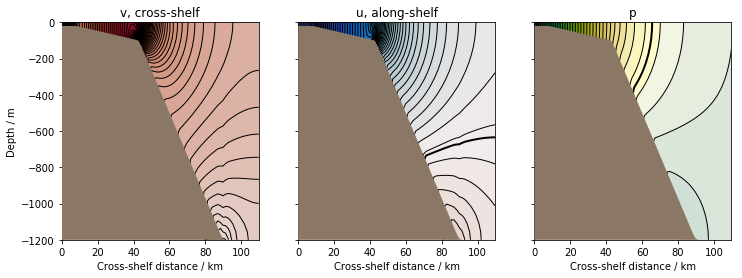

In [12]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode1_ASTAX.mat' ,
                                        '../AST/ratio_for_wave_mode1_ASTAX.mat')
minp = - np.nanmax(p)
maxp = np.nanmax(p)
nlevels = 70
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp, nlev=nlevels)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

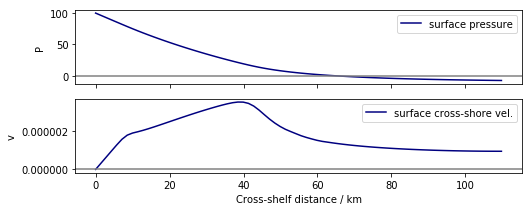

In [13]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 1.5074842098820447
k (rad/cm)  1e-10
lambda (km)  628318.5307179586
omega (rad/s)  9.928385416666662e-09
c (m/s) 0.9928385416666662


Text(0.5,0,'Cross-shelf distance / km')

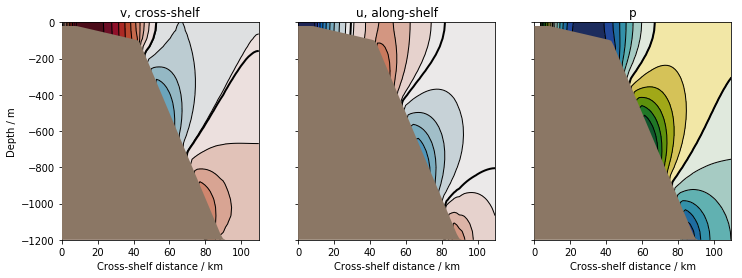

In [14]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_mode2_ASTAX.mat' ,
                                        '../AST/ratio_for_wave_mode2_ASTAX.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

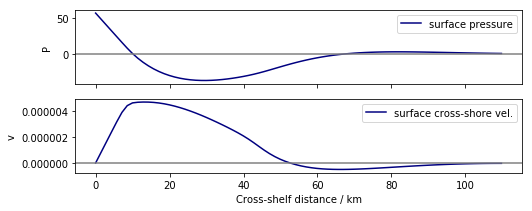

In [15]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

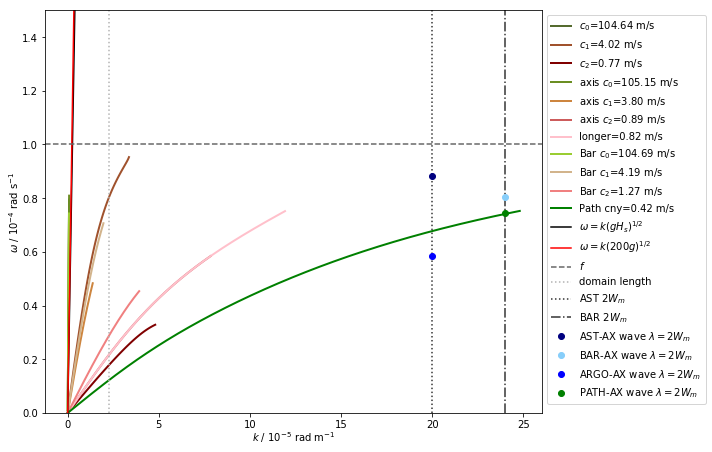

In [18]:
g = 9.81  # gravitational accel. m/s^2
Hs = 150  # m shelf break depth
f = 1.0E-4  # inertial frequency

files = ['../AST/dispc_mode0_AST.dat',
        '../AST/dispc_mode1_AST.dat',
        '../AST/dispc_mode2_AST.dat',
        '../AST/dispc_mode0_ASTAX.dat',
         '../AST/dispc_mode1_ASTAX.dat',
         '../AST/dispc_mode2_ASTAX.dat',
         '../AST/dispc_mode2_ASTAX_longest.dat',
         '../BAR/dispc_mode0_BAR.dat',
         '../BAR/dispc_mode1_BAR.dat',
         '../BAR/dispc_mode2_BAR.dat',
         '../PATH/dispc_PATHAX.dat'
        ]
colors = ['darkolivegreen',
         'sienna',
         'maroon',
         'olivedrab',
         'peru', 
         'indianred',
         'pink',
         'yellowgreen',
         'tan',
         'lightcoral',
         'green']
labels = ['$c_0$','$c_1$','$c_2$','axis $c_0$','axis $c_1$','axis $c_2$','longer','Bar $c_0$','Bar $c_1$','Bar $c_2$','Path cny']

fig1, ax0 = plt.subplots(1, 1, figsize=(10, 6.5))
for file, col, lab in zip(files, colors, labels):
    data_mode = pd.read_csv(file, delim_whitespace=True, header=None, names=['wavenum', 'freq', 'perturbation'])
    omega = data_mode['freq'][:-3]
    k = data_mode['wavenum'][:-3]*100
    ax0.plot(k*1E5, omega*1E4, '-',
             color=col,linewidth=2,
             label=lab+'=%1.2f m/s' % (np.mean(omega/k)))

k_vec = np.linspace(1E-10,1E-5,20)
ax0.plot(k_vec*1E5, (k_vec*(g*Hs)**0.5)*1E4, '-',color='k', label=r'$\omega=k(gH_s)^{1/2}$')
ax0.plot(k_vec*1E5, (k_vec*(g*200)**0.5)*1E4, '-',color='r', label=r'$\omega=k(200g)^{1/2}$')

ax0.axhline(f*1E4, linestyle='--', color='0.4', label='$f$')
ax0.axvline(2.24, linestyle=':', color='0.7', label='domain length')
ax0.axvline(20.0, linestyle=':', color='0.2', label='AST $2W_m$')
ax0.axvline(24.0, linestyle='-.', color='0.2', label='BAR $2W_m$')
ax0.plot(20,0.8838,'o',color='navy', label='AST-AX wave $\lambda=2W_m$')
ax0.plot(24,0.80609375,'o',color='lightskyblue', label='BAR-AX wave $\lambda=2W_m$')
ax0.plot(20,0.584,'o',color='blue',label='ARGO-AX wave $\lambda=2W_m$')
ax0.plot(24,0.745,'o',color='green',label='PATH-AX wave $\lambda=2W_m$')

ax0.set_xlabel(r'$k$ / $10^{-5}$ rad m$^{-1}$', labelpad=0.1)
ax0.set_ylabel(r'$\omega$ / $10^{-4}$ rad s$^{-1}$', labelpad=0.1)
ax0.set_ylim(0, f*1.5*1E4)
ax0.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('../figures/disp_curve_all.png', format='png', bbox_inches='tight')

In [20]:
D = 280E3 #  m
c0 = 105.15 #  m/s
c1 = 3.80
c2 = 0.89
c_ast = 8.838E-5/2E-4
c_bar = 8.0609375E-5/2.4E-4
c_argo = 5.84E-5/2E-4
c_path = 7.45E-5/2.4E-4
T0 = D/c0
T1 = D/c1
T2 = D/c2
Tast = D/c_ast
Tbar = D/c_bar
Targo = D/c_argo
Tpath = D/c_path

print('Mode 0 takes %1.2f days to recirculate' %(T0/(3600*24)))
print('Mode 1 takes %1.2f days to recirculate' %(T1/(3600*24)))
print('Mode 2 takes %1.2f days to recirculate' %(T2/(3600*24)))
print('Astoria canyon wave takes %1.2f days to recirculate' %(Tast/(3600*24)))
print('Barkley canyon wave takes %1.2f days to recirculate' %(Tbar/(3600*24)))
print('ARGO canyon wave takes %1.2f days to recirculate' %(Targo/(3600*24)))
print('PATH canyon wave takes %1.2f days to recirculate' %(Tpath/(3600*24)))


Mode 0 takes 0.03 days to recirculate
Mode 1 takes 0.85 days to recirculate
Mode 2 takes 3.64 days to recirculate
Astoria canyon wave takes 7.33 days to recirculate
Barkley canyon wave takes 9.65 days to recirculate
ARGO canyon wave takes 11.10 days to recirculate
PATH canyon wave takes 10.44 days to recirculate


Short wave of wavelength $\approx 2W$

Astoria width at mouth = 15.7 km

Astoria wave length 31.4 km, wave number $2\times10^{-4}$  m$^{-1}$

Barkely width at mouth = 13.0 km

Barkley wave length = 26 km wave numbers $2.4\times10^{-4}$  m$^{-1}$ 


### Astoria short wave (2Wm)

- Found using canyon axis profile because there is where it is generated

ratio for wave 1.1384294945435087
k (rad/cm)  2e-06
lambda (km)  31.415926535897935
omega (rad/s)  8.838e-05
c (m/s) 0.44190000000000007


Text(0.5,0,'Cross-shelf distance / km')

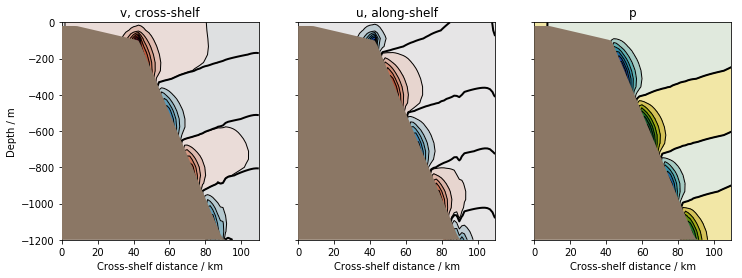

In [21]:
#  Astoria mid length wave
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../AST/figures_ASTAX_k2E-4.mat' ,
                                        '../AST/ratio_for_wave_ASTAX_k2E-4.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

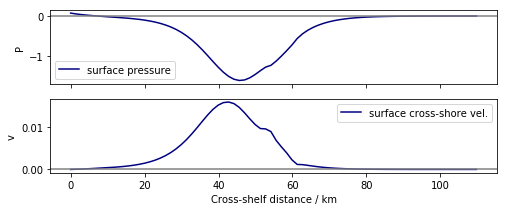

In [22]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

### Barkley short wave (2Wm)

ratio for wave 1.4324657136823382
k (rad/cm)  2.4e-06
lambda (km)  26.179938779914945
omega (rad/s)  8.0609375e-05
c (m/s) 0.3358723958333334


Text(0.5,0,'Cross-shelf distance / km')

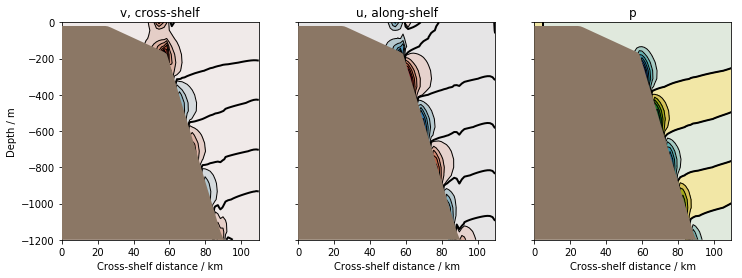

In [23]:
# Barkley mid length wave
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_BARAX_k2p4E-4.mat' ,
                                        '../BAR/ratio_for_wave_BARAX_k2p4E-4.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

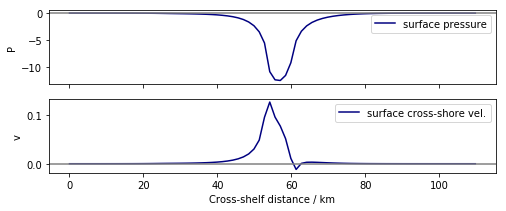

In [24]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

### ARGO short wave (2Wm)

ratio for wave 1.0808955329343022
k (rad/cm)  2e-06
lambda (km)  31.415926535897935
omega (rad/s)  5.8407812500000004e-05
c (m/s) 0.29203906250000006


Text(0.5,0,'Cross-shelf distance / km')

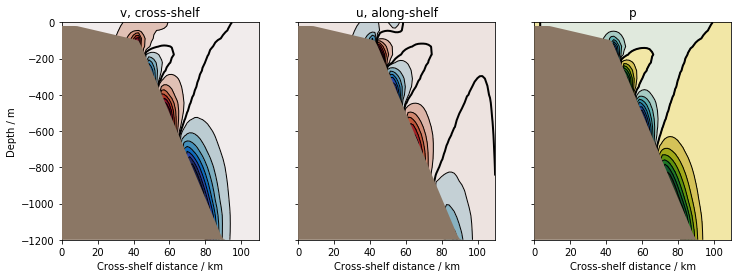

In [25]:
# mid length wave
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../ARGO/figures_ARGOAX.mat' ,
                                        '../ARGO/ratio_for_wave_ARGOAX.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

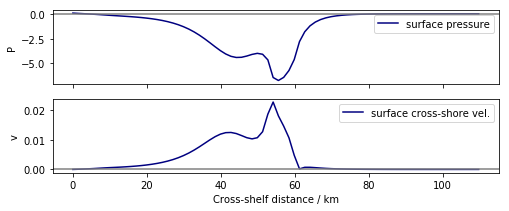

In [26]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

### PATH short wave (2Wm)

ratio for wave 1.0731896494793922
k (rad/cm)  2.4e-06
lambda (km)  26.179938779914945
omega (rad/s)  -1.6263032587282567e-19
c (m/s) -6.776263578034404e-16


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,0,'Cross-shelf distance / km')

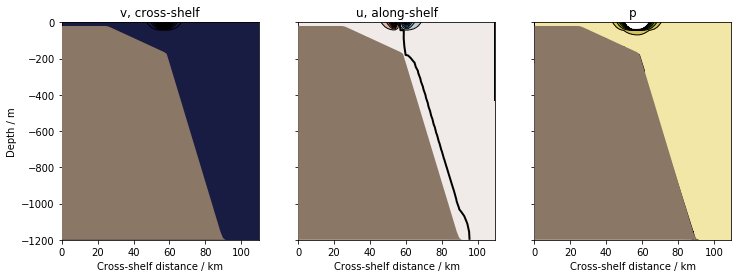

In [27]:
# mid length wave
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../PATH/figures_PATHAX.mat' ,
                                        '../PATH/ratio_for_wave_PATHAX.mat')
#minp = np.nanmin(p)
#maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')